In [ ]:
# TRAITEMENT DES DONNEES MANQUANTES 
# Nous remplaçons les données manquantes des colonnes catégorielles par les valeurs qui 
# qui ont la plus grande fréquence(qui se repètent le plus dans la colonne)

In [2]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_csv('Datasets/datasetClientsBanque.csv')

In [92]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [93]:
# Affichage de toutes les lignes du dataFrame
# pd.set_option('display.max_rows',df.shape[0]+1)

In [94]:
# Retour à l'affichage des dix lignes 
# pd.set_option('display.max_rows',10)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [96]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [97]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [98]:
# DESCRIPTION DES COLONNES

In [99]:
# Gender : Le genre du demandeur
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [100]:
# Married : Le statut marital du demandeur
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [101]:
# Dependents : Personnes à charge du demandeur
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [102]:
# Education : Niveau d'étude du demandeur
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [103]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [104]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [105]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [106]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [107]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [108]:
# Suppression de la colonne Loan_ID
df = df.drop('Loan_ID',axis=1)

In [109]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
                     ..
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Length: 12, dtype: int64

In [110]:
(100* df.isnull().sum() / len(df)).sort_values(ascending=False)

Credit_History       8.143322
Self_Employed        5.211726
LoanAmount           3.583062
Dependents           2.442997
Loan_Amount_Term     2.280130
                       ...   
Education            0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
Property_Area        0.000000
Loan_Status          0.000000
Length: 12, dtype: float64

In [111]:
# Fonction pour calculer le pourcentage des données manquantes(NaN)
def pourcentage_nan(df):
    pourcent_nan_data = 100* df.isnull().sum() / len(df)
    pourcent_nan_data = pourcent_nan_data[pourcent_nan_data>0].sort_values()
    return pourcent_nan_data

In [112]:
# Application de la fonction sur le dataframe
data_missing_percent = pourcentage_nan(df)

In [113]:
data_missing_percent

Married             0.488599
Gender              2.117264
Loan_Amount_Term    2.280130
Dependents          2.442997
LoanAmount          3.583062
Self_Employed       5.211726
Credit_History      8.143322
dtype: float64

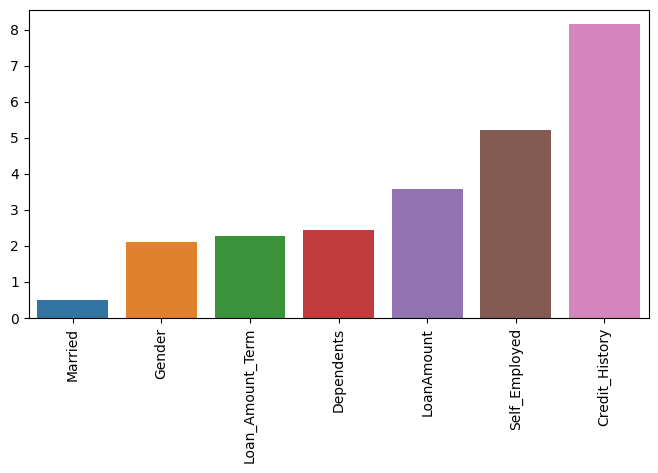

In [117]:
# VISUALISATION DES POURCENTAGES DES DONNEES MANQUANTES PAR FEATURES
plt.figure(figsize=(8,4),dpi=100)
sns.barplot(x=data_missing_percent.index,y=data_missing_percent)
plt.xticks(rotation=90);

In [ ]:
# Renseignement des données manquantes des colonnes catégorielles

In [69]:
# La Colonne : Married
df['Married'] = df['Married'].fillna('No')

In [76]:
# La colonne : Gender 
df['Gender'] = df['Gender'].fillna('Male')

In [ ]:
# La colonne : Dependents
df['Dependents'] = df['Dependents'].fillna('0')

In [79]:
# La colonne : Self_Employed
df['Self_Employed'] = df['Self_Employed'].fillna('No')

In [ ]:
# Renseignement des données manquantes des colonnes numériques

In [80]:
# La colonne : Loan_Amount_Term
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [81]:
# La colonne : Loan_Amount
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [85]:
# La colonne : Loan_Amount
df['Credit_History'] = df['Credit_History'].fillna(0.0)

In [86]:
# Application de la fonction sur le dataframe
data_missing_percent = pourcentage_nan(df)

In [87]:
# Pas de valeurs manquantes
data_missing_percent

Series([], dtype: float64)

In [89]:
df.to_csv("Clients_No_NaN.csv",index=False)